## The Machine Learning and Deep Learning Show 


## By AKANKSHA

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/matplotlib/font_manager.py:281: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
dataset = pd.read_csv("Data/glass.csv")
dataset.fillna(0)
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
dataset.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


### Top correlation between columns:

* Type [-1] vs Na [1]: 0.5
* Type [-1] vs Al [3]: 0.6
* Type[-1] vs Ba [-3]: 0.57

In [19]:
na = dataset["Na"].values
al = dataset["Al"].values
ba = dataset["Ba"].values

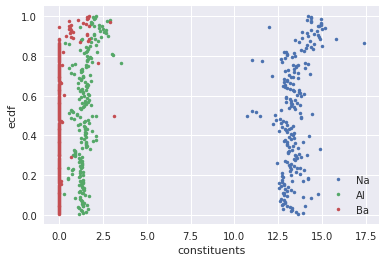

In [21]:
y_ecdf = np.arange(1, len(na) + 1)/len(na)
import seaborn as sns
sns.set()
plt.plot(na, y_ecdf, marker = ".", linestyle = "none")
plt.plot(al, y_ecdf, marker = ".", linestyle = "none")
plt.plot(ba, y_ecdf, marker = ".", linestyle = "none")
plt.xlabel("constituents")
plt.ylabel("ecdf")
plt.legend(("Na", "Al", "Ba"), loc="lower right")
plt.show()

In [9]:
from sklearn.cluster import KMeans

## Number of clusters

In [27]:
X = np.array(list(zip(na, al, ba)))
kmeans = KMeans(n_clusters=6)

## Fitting the input data


In [28]:
kmeans = kmeans.fit(X)

## Getting the cluster labels


In [29]:
labels = kmeans.predict(X)

## Centroid values

In [30]:
centroids = kmeans.cluster_centers_

In [31]:
print("centroids location: \n")
print(centroids)

centroids location: 

[[1.14811111e+01 1.36888889e+00 3.50000000e-01]
 [1.43810000e+01 2.40100000e+00 4.25500000e-01]
 [1.30596875e+01 1.37718750e+00 7.81250000e-03]
 [1.45778571e+01 2.02357143e+00 1.70357143e+00]
 [1.73800000e+01 3.40000000e-01 0.00000000e+00]
 [1.39338095e+01 1.04571429e+00 2.26190476e-02]]


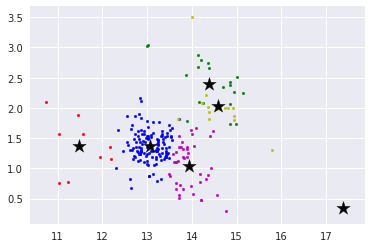

In [32]:
k= 6 #no. of clusters
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1], c=colors[i], s=7)
        
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505')

In [34]:
test_na = [15.9]
test_al = [1.7]
test_ba = [0]
testing = np.array(list(zip(test_na, test_al, test_ba)))
pred_km = kmeans.predict(testing)
pred_km

array([1], dtype=int32)